In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

#G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out, IH= In half time?

df_matches = pd.read_csv('data_raw/WorldCupMatches.csv', sep=',')
df_players = pd.read_csv('data_raw/WorldCupPlayers.csv', sep=',')
df_cups = pd.read_csv('data_raw/WorldCups.csv', sep=',')

df_events = pd.read_csv('data_prepared/event.csv', sep=',').replace(np.nan, '', regex=True)
df_penalties = pd.read_csv('data_prepared/penalties.csv', encoding='iso-8859-1', sep=',')

# General information about Football World Cups

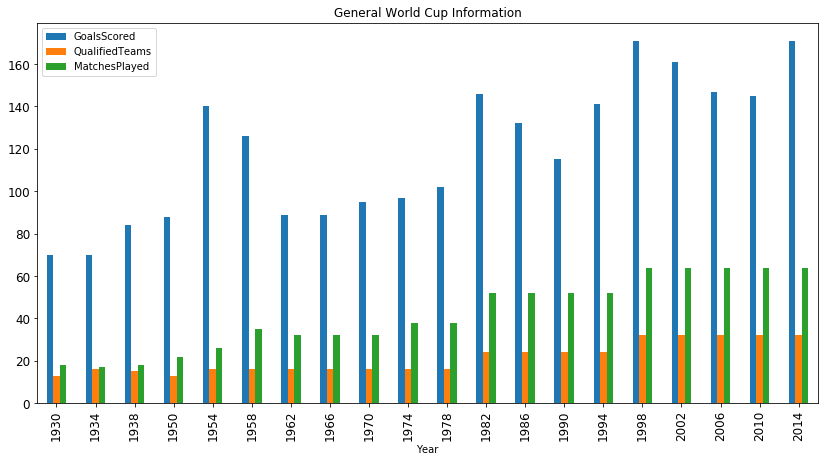

In [90]:
df_cups.set_index('Year').plot(kind='bar', title="General World Cup Information", figsize=(14,7), legend=True, fontsize=12)
plt.show()

# Attendance per World Cup

In [95]:
# Data preparation
df_cups_attendance = df_cups[["Year", "Attendance"]]
df_cups_attendance['Attendance'] = df_cups_attendance['Attendance'].str.replace('.', '')
df_cups_attendance['Attendance'] = df_cups_attendance.Attendance.astype(float)
df_cups_attendance.dtypes

C:\Users\D064012\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\D064012\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Year            int64
Attendance    float64
dtype: object

## Total Attendance per World Cup

<Figure size 864x432 with 0 Axes>

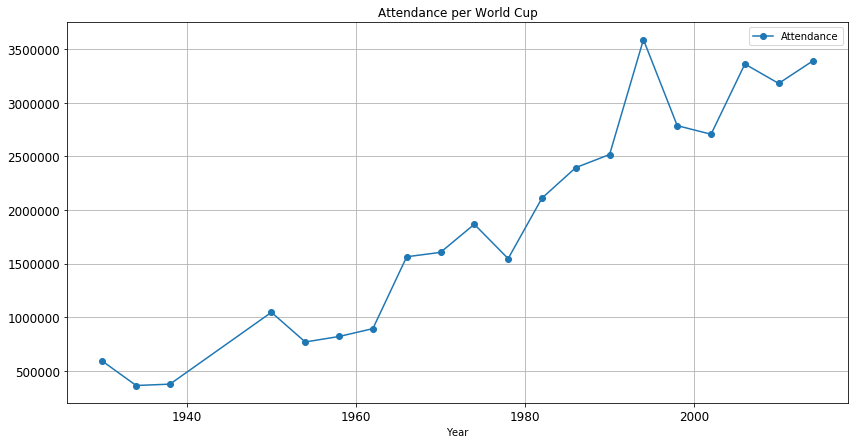

In [73]:
plt.figure(figsize=(12,6))
df_cups_attendance.set_index("Year").plot(style="o-", title="Attendance per World Cup", figsize=(14,7), legend=True, fontsize=12)
plt.grid()
plt.show()

## Average Attendance per World Cup

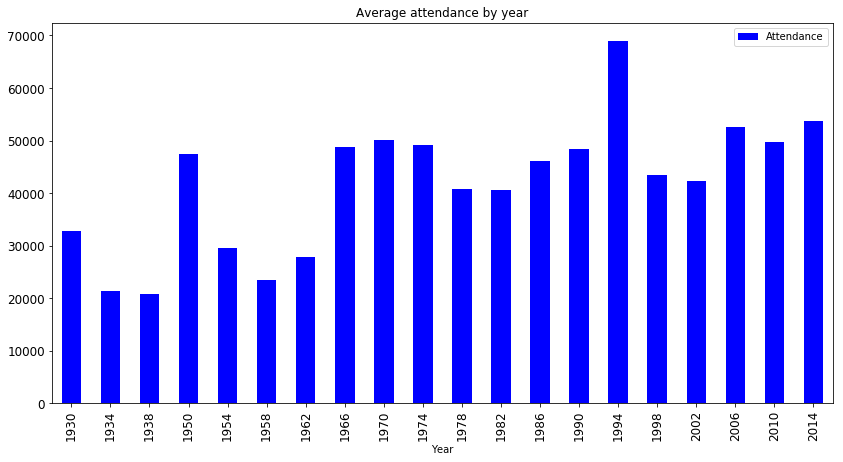

In [92]:
df_avg_attendance = df_matches.groupby("Year")["Attendance"].mean().reset_index()
df_avg_attendance["Year"] = df_avg_attendance["Year"].astype(int)
df_avg_attendance.set_index("Year").plot(kind='bar', color="b", title="Average attendance by year", figsize=(14,7), legend=True, fontsize=12)
plt.show()


# Player with the most goals across all World Cups

In [6]:
# https://www.weltfussball.de/ewige_torjaeger/wm/tore/1/
# data consistency not sufficient for this calculation as player names are not unique

In [7]:
df_players_goals = df_events[["Player Name", "EventType"]]
df_players_goals = df_players_goals[df_players_goals.EventType.str.contains("G") == True]
df_players_goals = df_players_goals[df_players_goals.EventType.str.contains("P") == False]
df_players_goals = df_players_goals[df_players_goals.EventType.str.contains("I") == False]
df_players_goals = df_players_goals[df_players_goals.EventType.str.contains("Y") == False]
df_players_goals = df_players_goals[df_players_goals.EventType.str.contains("R") == False]
df_players_goals = df_players_goals[df_players_goals.EventType.str.contains("O") == False]

df_players_goals.groupby(["Player Name"])
df_players_goals.dropna()

,Player Name,EventType
2,Marcel LANGILLER,G
3,Juan CARRENO,G
6,Andre MASCHINOT,G
7,Andre MASCHINOT,G
15,Lucien LAURENT,G
36,Tom FLORIE,G
42,Bart McGHEE,G
46,Bert PATENAUDE,G
74,Ivica BEK,G
75,PREGUINHO,G


## List of top scoring players

In [100]:
# Display as list

# f = {
#      'EventType':'count'
#     }

# df_test = df_players_goals.groupby(['Player Name']).agg(f)
# df_test['EventType'].sort_values(ascending=False)

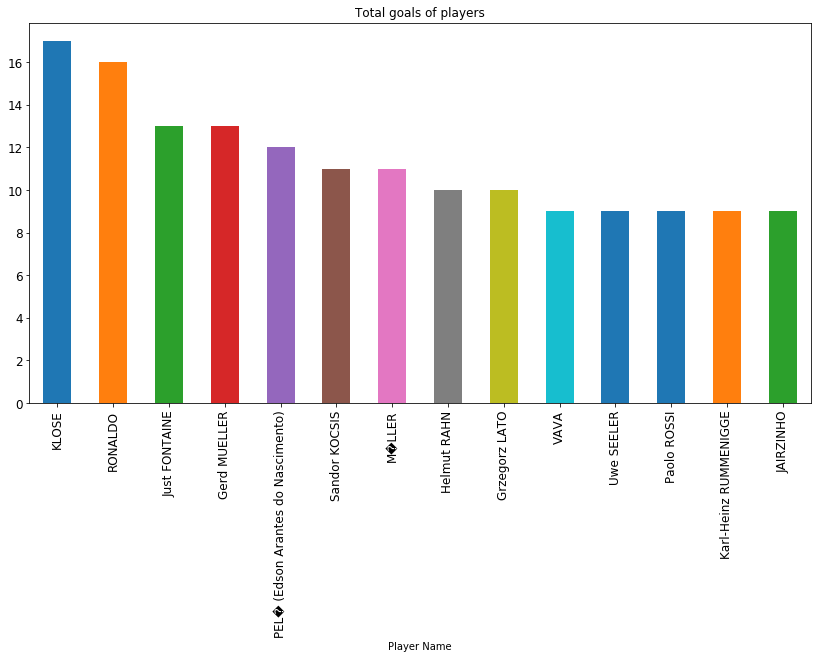

In [99]:
f = {
     'EventType':'count'
    }

df_top_players = df_players_goals.groupby(['Player Name']).agg(f)
df_top_players['EventType'].sort_values(ascending=False)
df_top14_players = df_top_players[df_test.EventType > 8]
df_top14_players['EventType'].sort_values(ascending=False).plot(kind='bar', title="Total goals of players", figsize=(14,7), legend=False, fontsize=12)
plt.show()

# Fun with Penalty data

The used dataset covers only penalty shoot-outs after regular time. Penalty shoot-outs were introduced in 1972.

In [11]:
# data preparation
df_penalties["Match Result"] = df_penalties["Match Result"].str.replace("","-")
df_penalties["Final Result"] = df_penalties["Final Result"].str.replace("","-")

df_penalties["Winner Penalty Goals"] = df_penalties["Final Result"].str.split("-").str[0]
df_penalties["Loser Penalty Goals"]  = df_penalties["Final Result"].str.split("-").str[1]

## Penalty overview

In [12]:
df_penalties

,Winner,Match Result,Loser,Year,Final Result,Round,Winner Penalty Goals,Loser Penalty Goals
0,Germany,3-3,France,1982,5-4,Semi-finals,5,4
1,France,1-1,Brazil,1986,4-3,Quarter-finals,4,3
2,Germany,0-0,Mexico,1986,4-1,Quarter-finals,4,1
3,Belgium,1-1,Spain,1986,5-4,Quarter-finals,5,4
4,Republic of Ireland,0-0,Romania,1990,5-4,Second round,5,4
5,Argentina,0-0,Yugoslavia,1990,3-2,Quarter-finals,3,2
6,Argentina,1-1,Italy,1990,4-3,Semi-finals,4,3
7,Germany,1-1,England,1990,4-3,Semi-finals,4,3
8,Bulgaria,1-1,Mexico,1994,3-1,Second round,3,1
9,Sweden,2-2,Romania,1994,5-4,Quarter-finals,5,4


## How many matches were dicided after penalty shoot-outs?

In [13]:
df_penalties[['Winner']].count()

Winner    26
dtype: int64

Between 1982 and 2014 took 26 penalty shoot-outs place

## How many penalty matches by year?

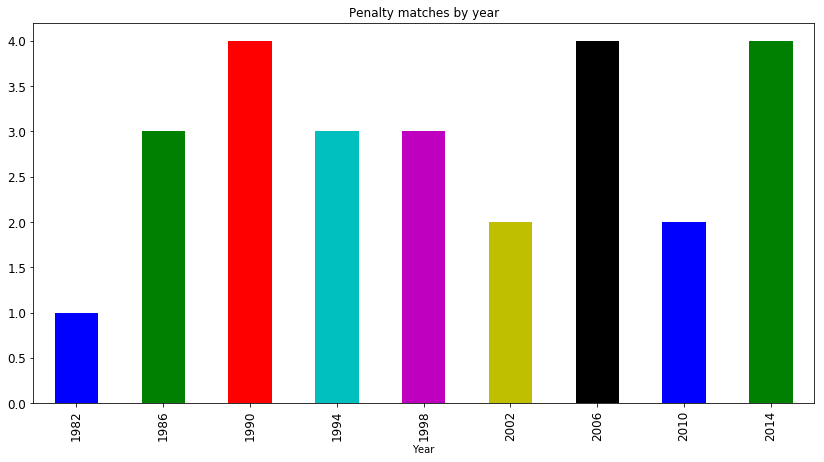

In [87]:
df_penalties_by_year = df_penalties['Year'].value_counts().reset_index()
df_penalties_by_year.columns = ['Year', 'Count']
df_penalties_by_year = df_penalties_by_year.sort_values(by='Year',ascending=True)
df_penalties_by_year.set_index("Year").plot(kind='bar',color='bgrcmyk', title="Penalty matches by year", figsize=(14,7), legend=False, fontsize=12)
plt.show()

## When decided a penalty shoot-out the world cup winner?

In [15]:
df_penalties[df_penalties['Round'] == 'Final']

,Winner,Match Result,Loser,Year,Final Result,Round,Winner Penalty Goals,Loser Penalty Goals
10,Brazil,0-0,Italy,1994,3-2,Final,3,2
19,Italy,1-1,France,2006,5-3,Final,5,3


In 1994 won Brazil against Italy with the endresult of 3:2, and in 2006 won Italy against France in the world cup final 5:3.

## Which team is the most successful on penalties?

In [25]:
df_penalty_winners = df_penalties["Winner"].value_counts().reset_index()
df_penalty_winners.columns = ["Country","Number of wins"]
df_penalty_winners.sort_values(by='Number of wins',ascending=False)

,Country,Number of wins
0,Germany,4
1,Argentina,4
2,Brazil,3
3,France,2
10,Sweden,1
15,Netherlands,1
14,Spain,1
13,Costa Rica,1
12,Paraguay,1
11,Italy,1


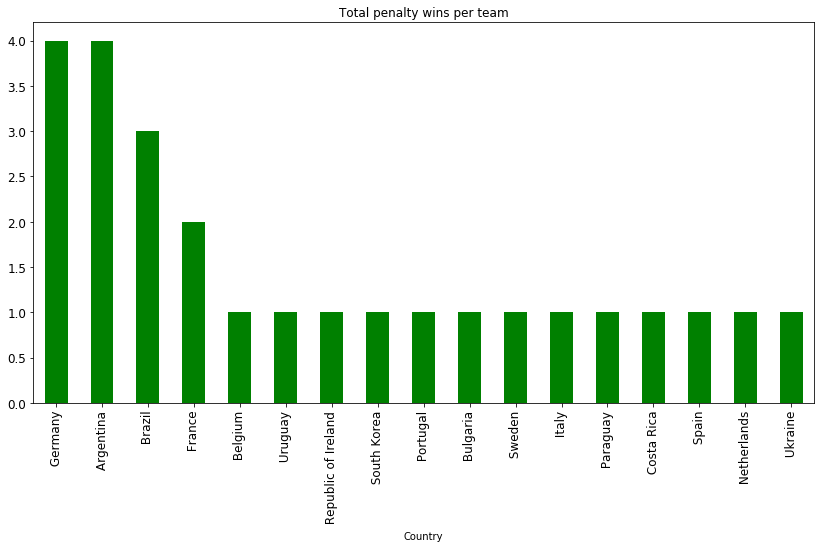

In [91]:
df_penalty_winners.set_index("Country").plot(kind="bar", color="g", title="Total penalty wins per team", figsize=(14,7), legend=False, fontsize=12)
plt.show()

## Which team is the less successful on penalty?

In [93]:
df_penalty_loosers = df_penalties["Loser"].value_counts().reset_index()
df_penalty_loosers.columns = ["Country","Number of loses"]
df_penalty_loosers.sort_values(by='Number of loses',ascending=False)

,Country,Number of loses
0,England,3
1,Italy,3
2,Romania,2
3,Netherlands,2
4,France,2
5,Spain,2
6,Mexico,2
12,Ghana,1
15,Brazil,1
14,Switzerland,1


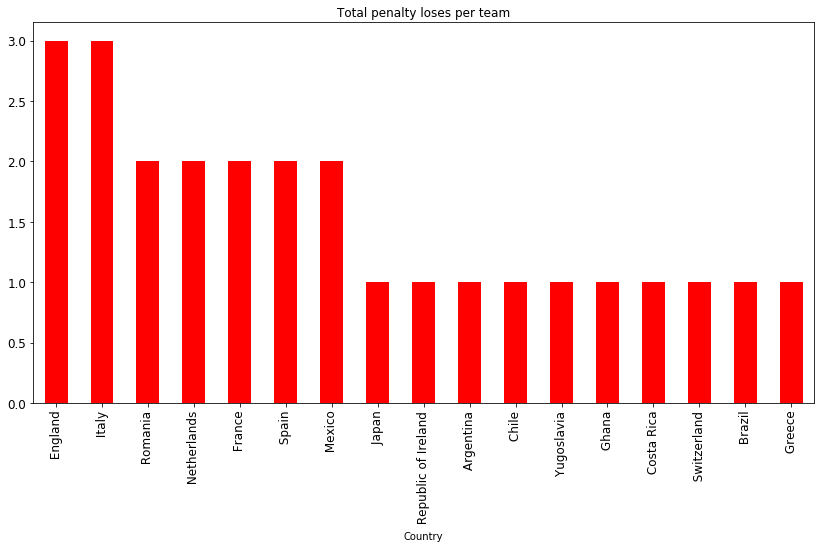

In [94]:
df_penalty_loosers.set_index("Country").plot(kind="bar", color="r", title="Total penalty loses per team", figsize=(14,7), legend=False, fontsize=12)
plt.show()